## About Dataset
### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration
To explore this type of models and learn more about the subject.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [117]:
df = pd.read_csv("../data/customer-churn-data.csv")

In [118]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
df.shape

(7043, 21)

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [121]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [122]:
df.drop("customerID", axis=1, inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


 There are no null values in the dataset

In [124]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries.

## Data distribution graphs

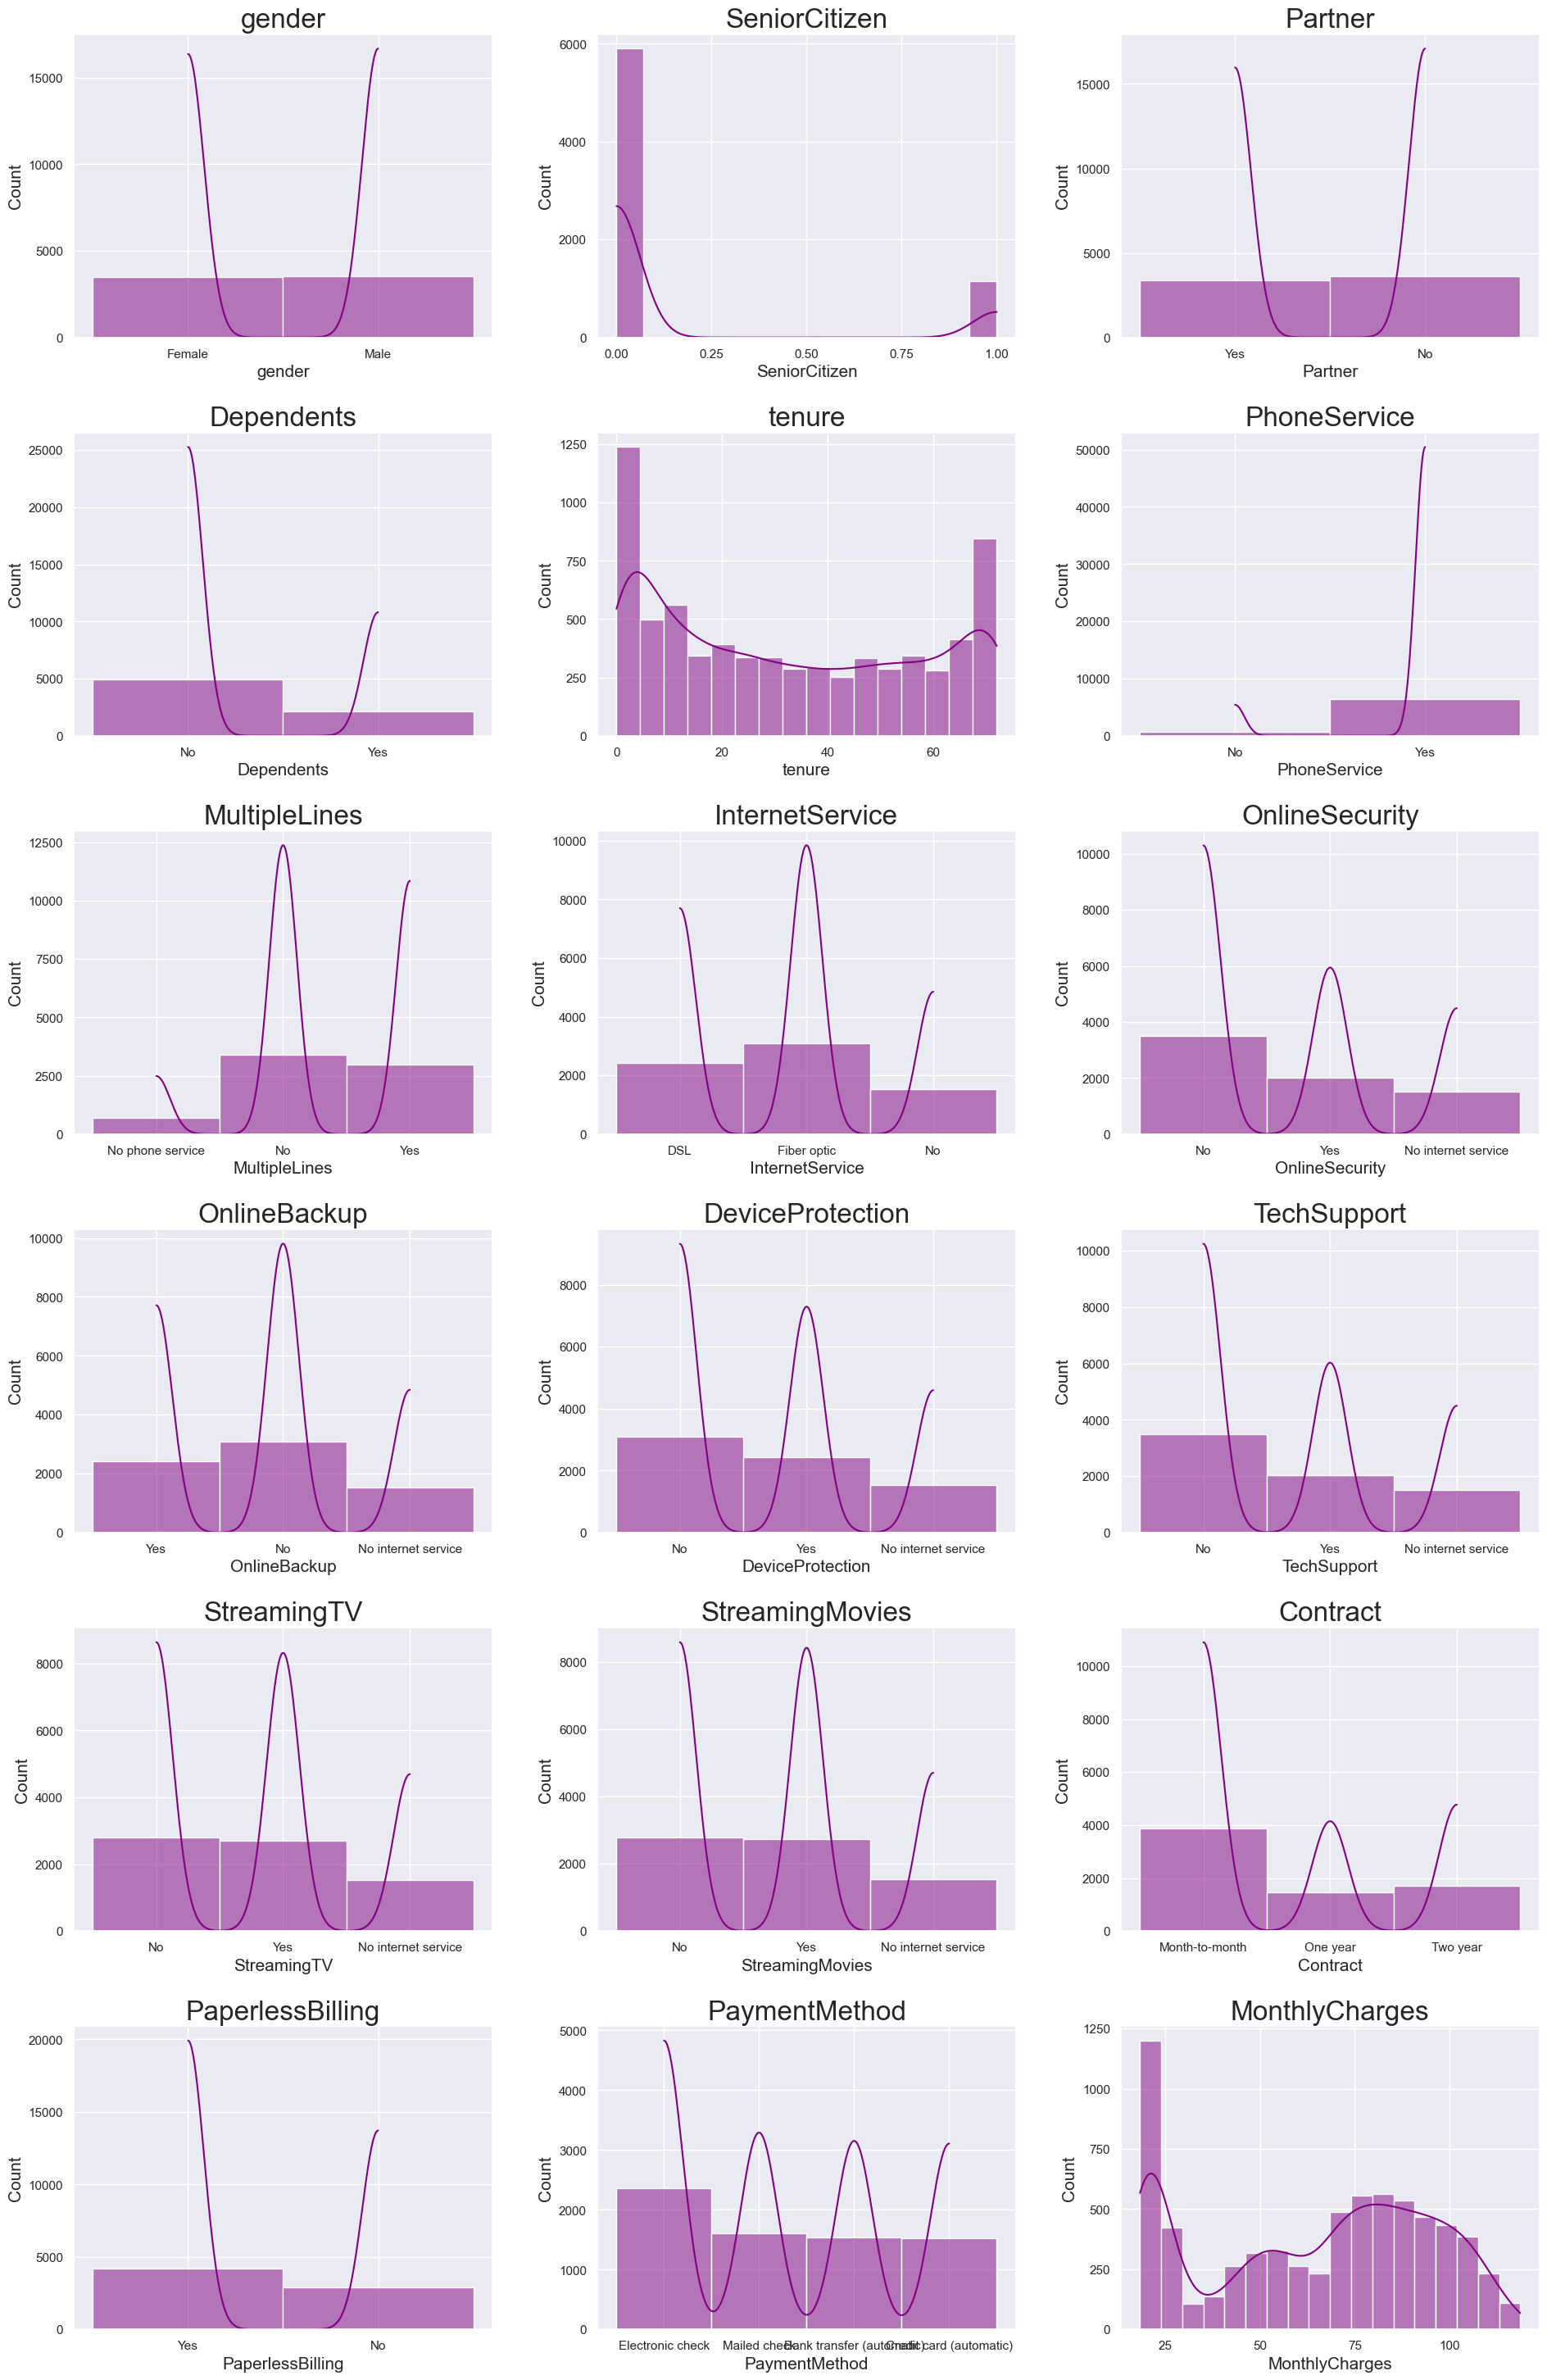

In [125]:
sns.set(rc={
    "font.size":15,
    "axes.titlesize":10,
    "axes.labelsize":15},
    style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f, ax in zip(df, axs.ravel()):
    sns.set(font_scale = 2)
    ax = sns.histplot(ax=ax, data=df, x=df[f], kde=True, color='purple')
    ax.set_title(f)

## Piechart perrcentage distribution features

In [126]:
new_df = df.copy()

In [127]:
new_df.drop(["tenure", "MonthlyCharges", "SeniorCitizen", "Churn"], axis=1, inplace=True)

IndexError: index 5 is out of bounds for axis 0 with size 5

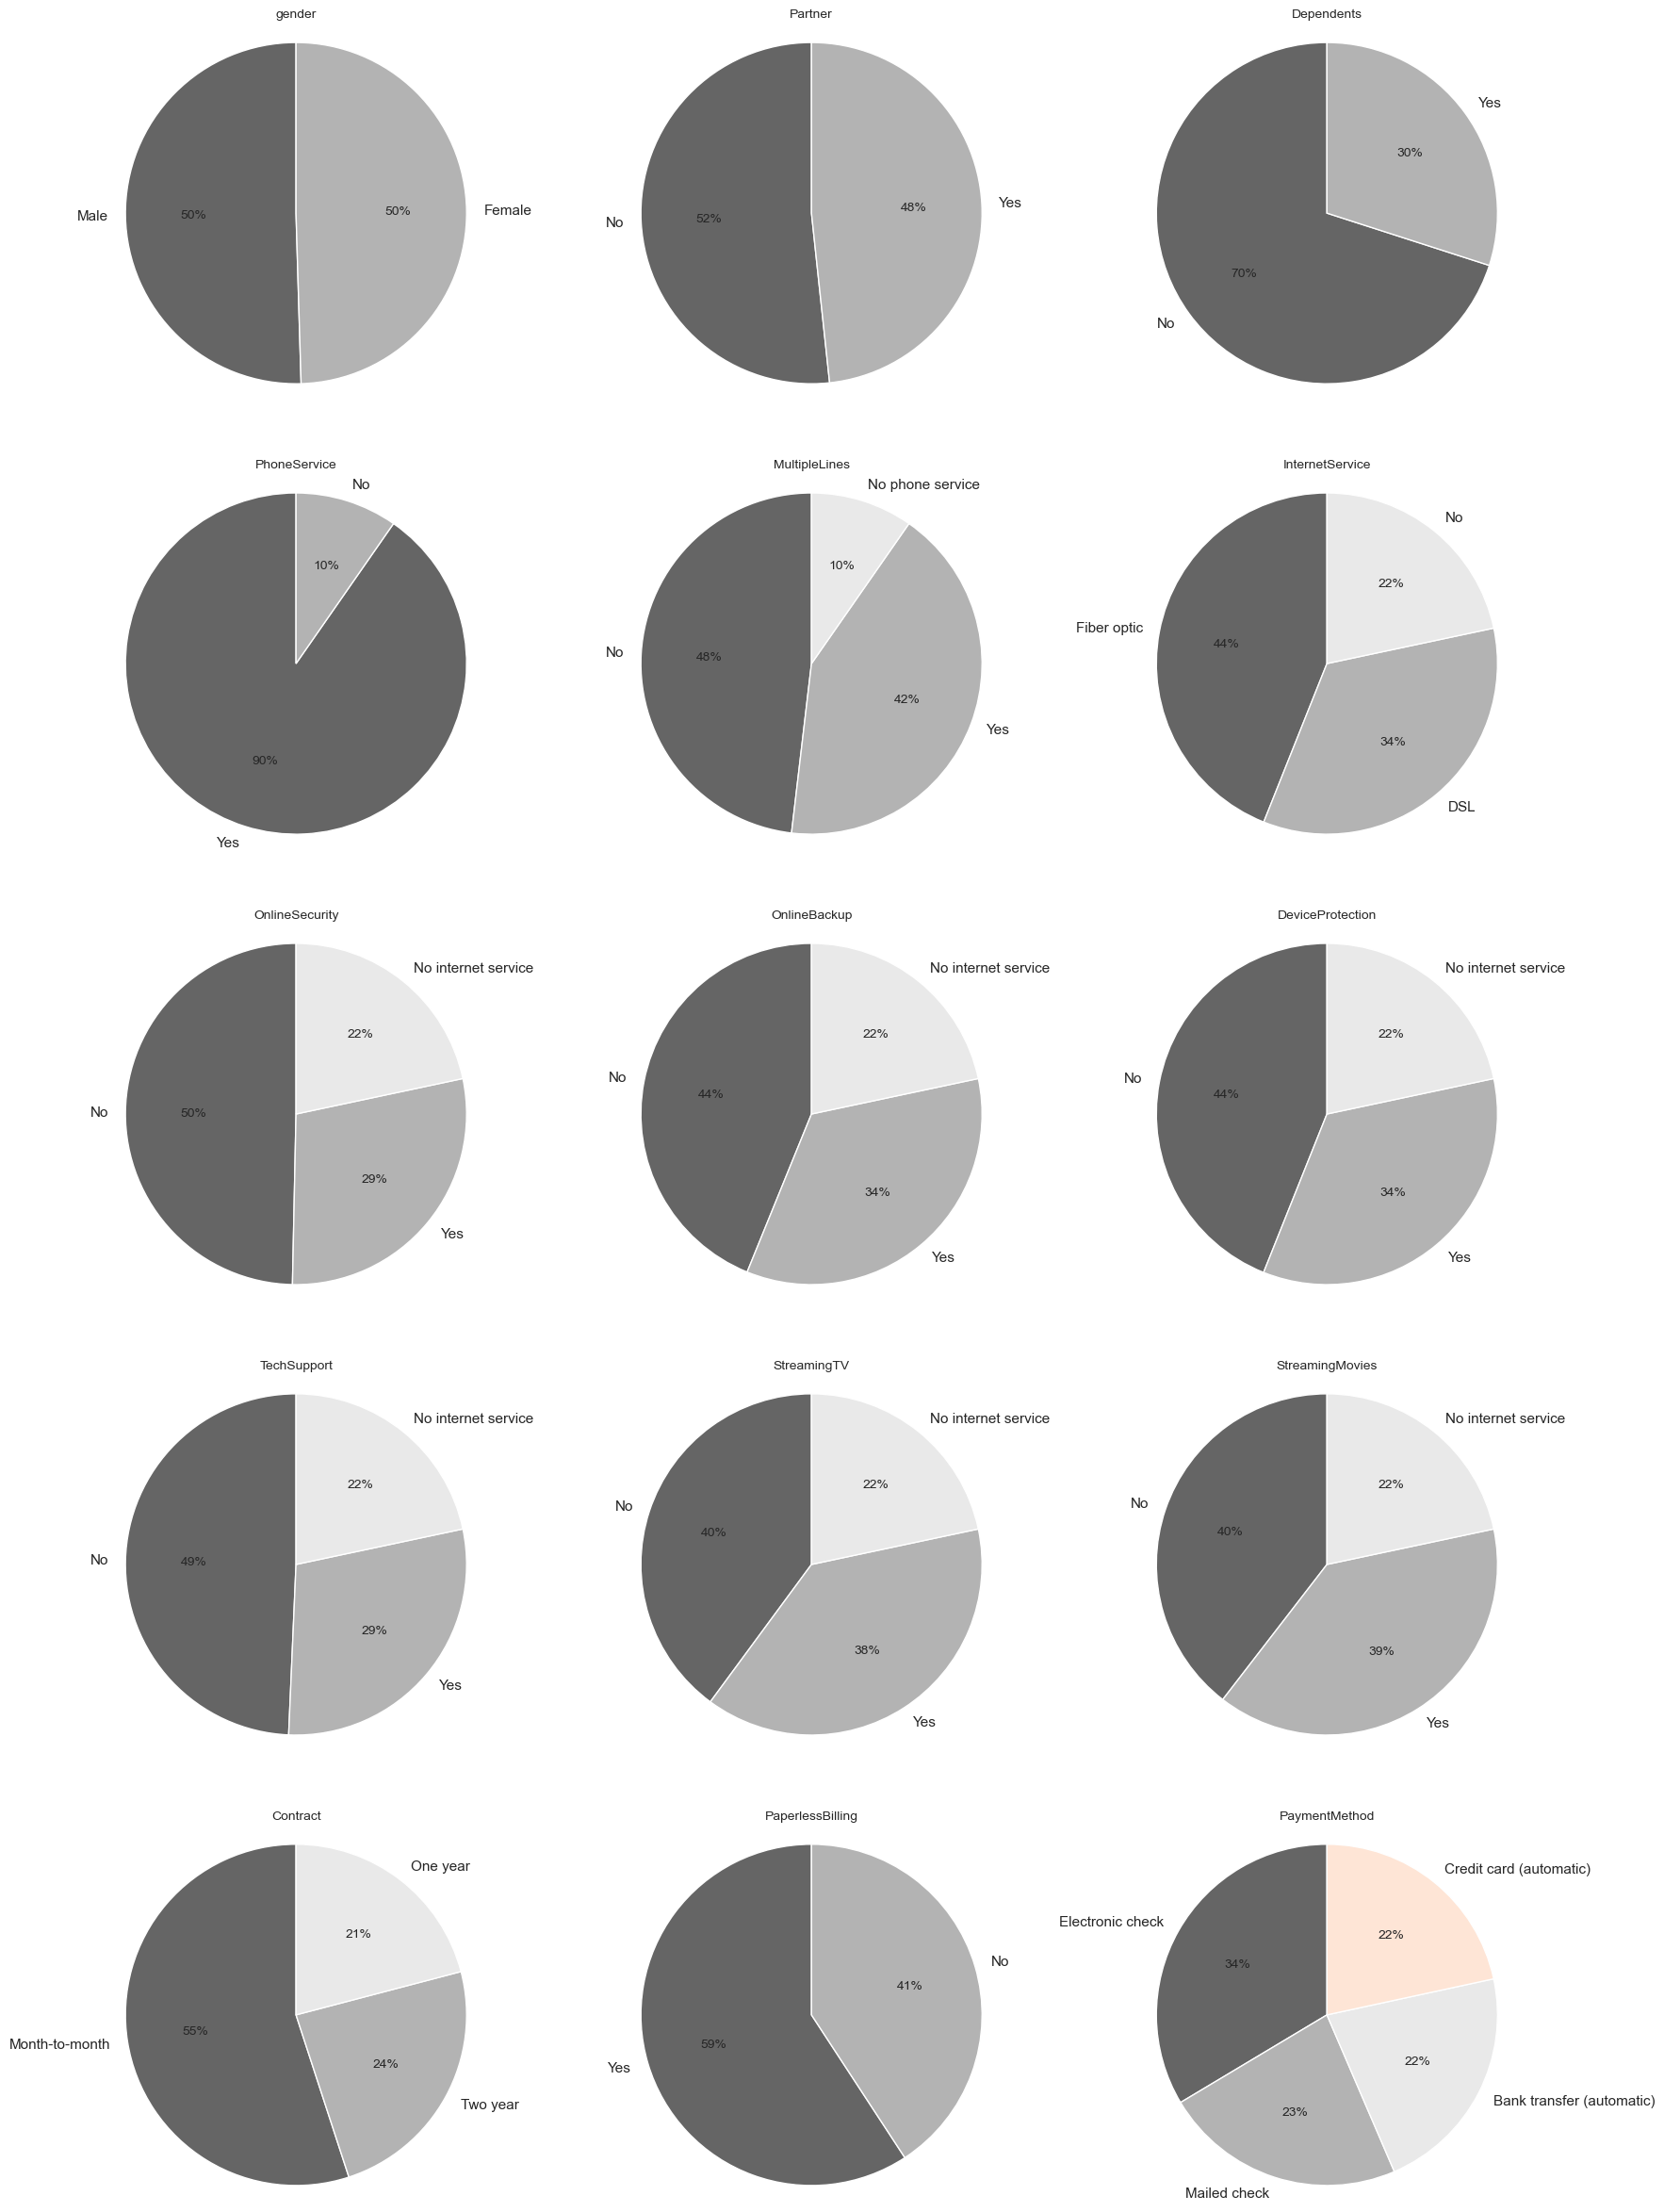

In [128]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(5, 3, figsize = (20, 30))
for i, col in enumerate(new_df):
    column_values = new_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes,labels = labels, colors = sns.color_palette("RdGy_r"),autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

**Observations**

- The number of men and women in this sample is approximately same
- Majority of the people have phone services(which is 90 percent) and almost half of the people have multiple lines
- 78% of the people have internet access either through fiberOptics or DSL
- About 56% have monthly subscriptions
- half of the people prefer paper billings
- 44% of the people opted for automatic transactions

In [131]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn')

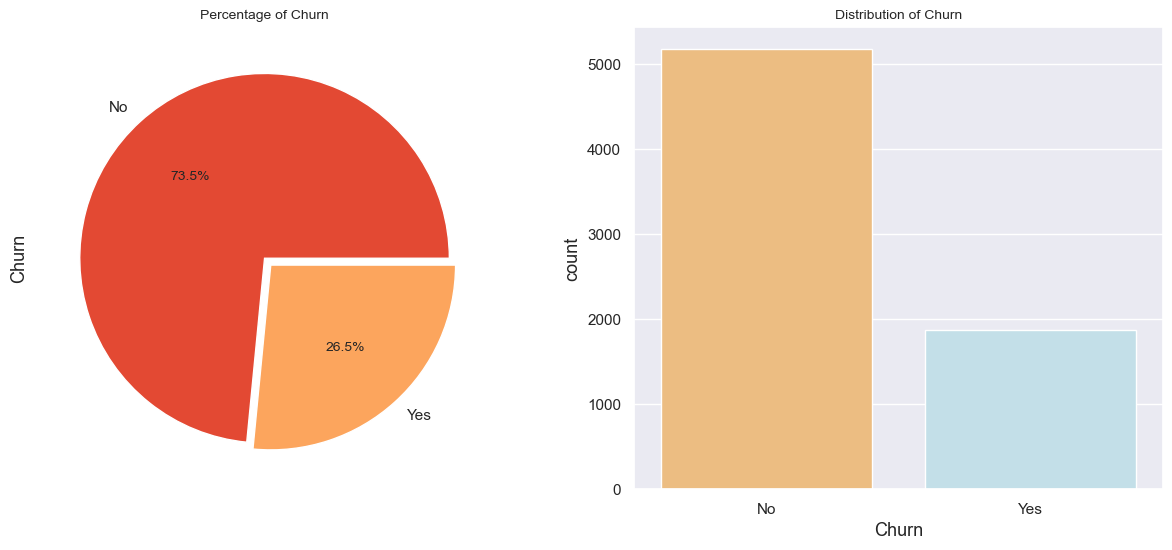

In [132]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
df.Churn.value_counts().plot.pie(explode=(0, 0.05), colors=sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title("Percentage of Churn")
sns.countplot(x= "Churn", data=df, ax=ax2, palette='RdYlBu')
ax2.set_title("Distribution of Churn")

**Observations**

- About 1/4 of the people left within the last month

**To analyse and visualise the data lets divide data columns into categorical and numerical columns.**

In [133]:
# numerical and categorical features
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
categorical_cols = df.select_dtypes('object').columns.to_list()

In [134]:

#numerical columns
print("Total number of columns are:",len(numerical_cols))
print(numerical_cols)

Total number of columns are: 3
['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [135]:
#Categorical Columns
print("Total number of columns are:",len(categorical_cols))
print(categorical_cols)

Total number of columns are: 17
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [136]:
categorical_cols.remove('Churn')

# Exploratory Data Analysis and Visualization on Numerical Columns

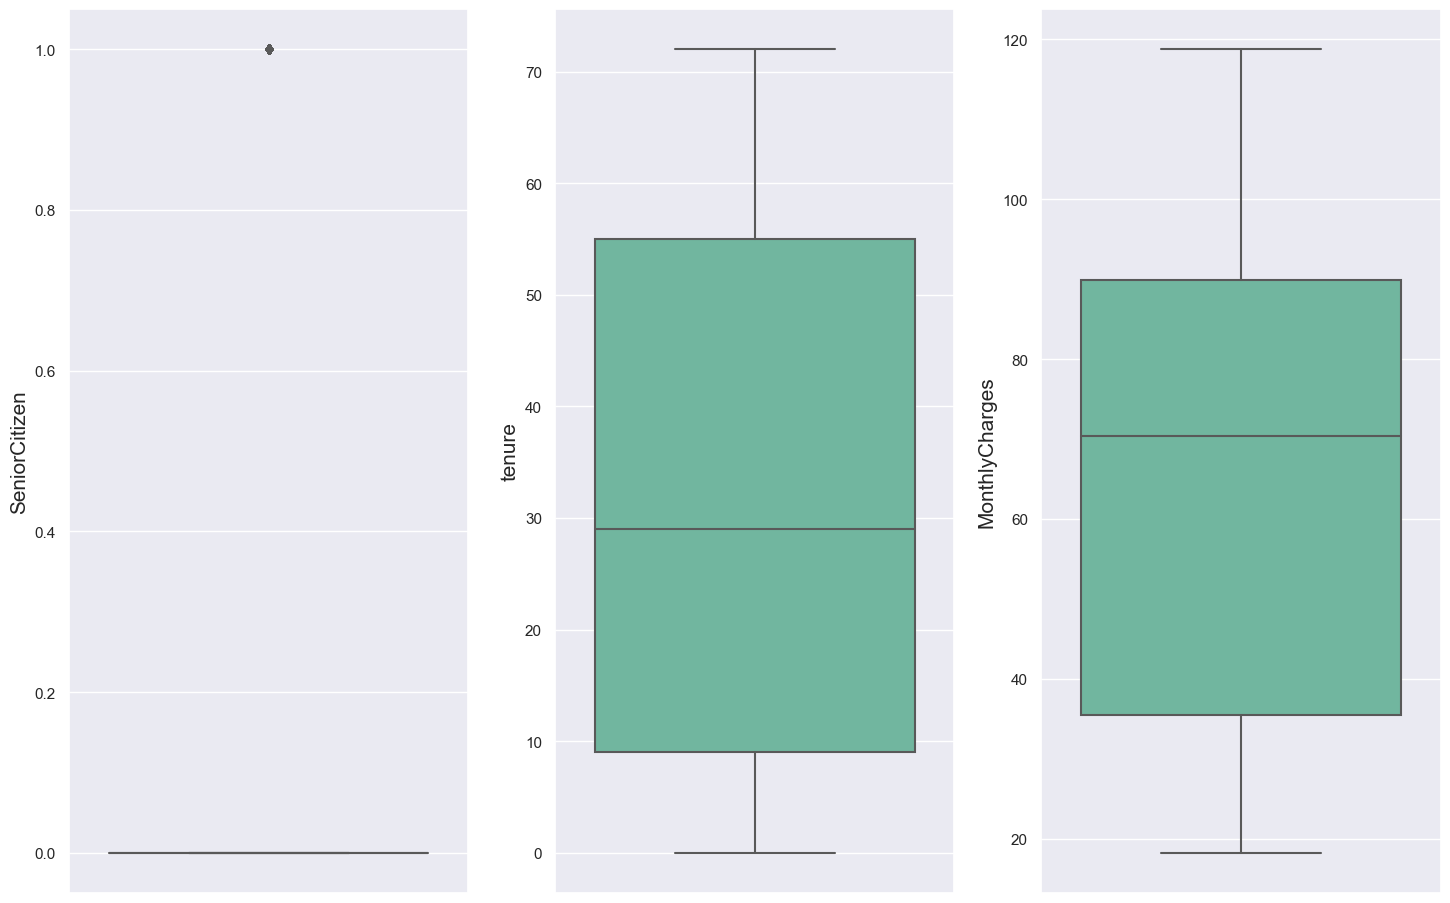

In [137]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
fig.tight_layout(pad=3.0)

for f, ax in zip(numerical_cols, axs.ravel()):
    sns.set(font_scale=2)
    ax= sns.boxplot(ax=ax, data=df, y=df[f], palette='BuGn')

## Barplot representation of numerical features

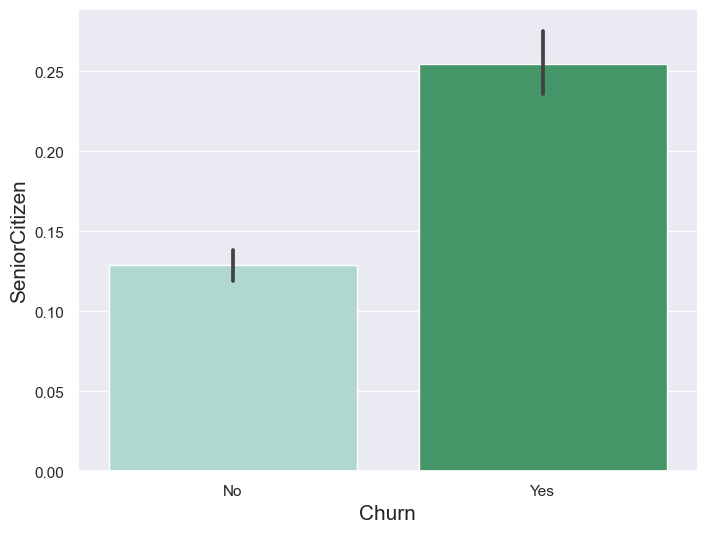

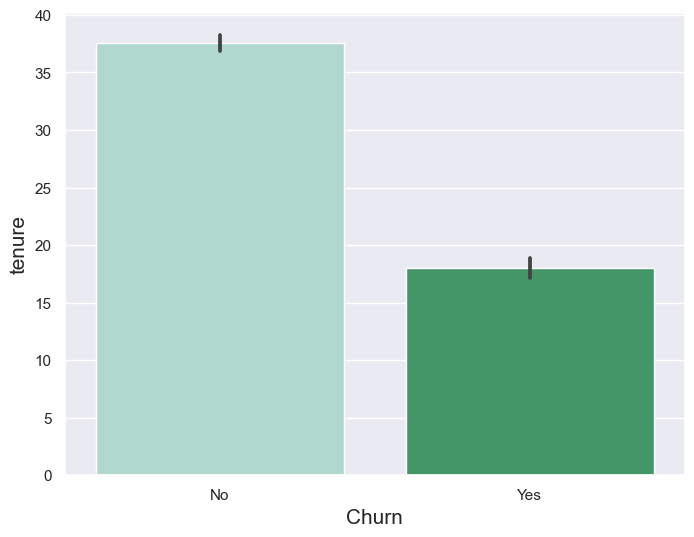

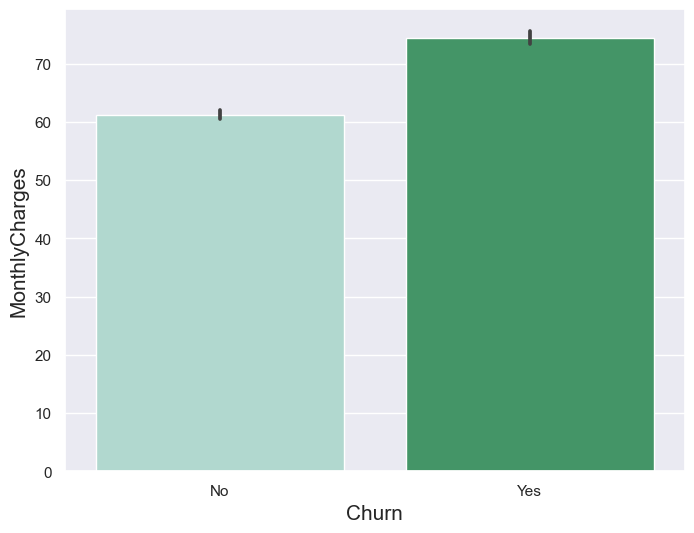

In [138]:
sns.set(rc={'figure.figsize':(8,6),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")

for col in numerical_cols:
    sns.barplot(data=df, x="Churn", y=col, palette='BuGn')
    plt.show()

**Observations**
- people bought monthly services are likely to leave when they dont want the servies obviously

# Exploratory Data Analysis and Visualization on Categorical Column

## Barplot representaion on Categoricol Column

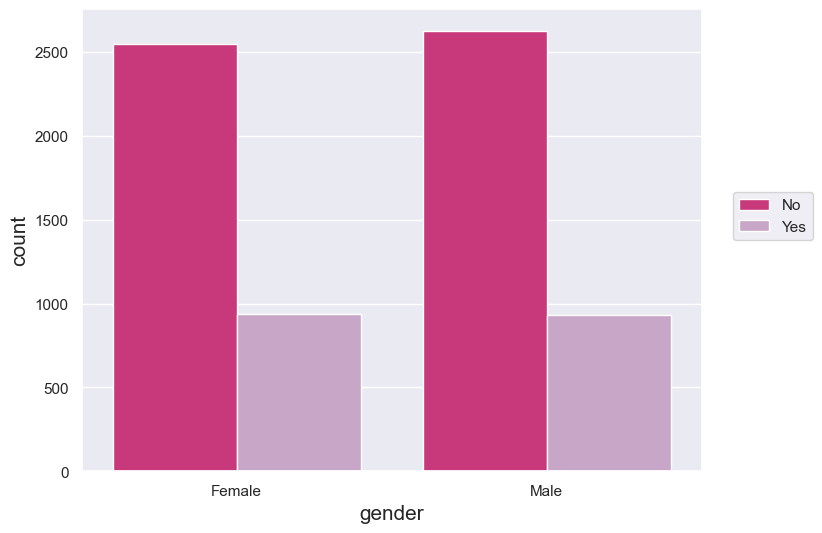

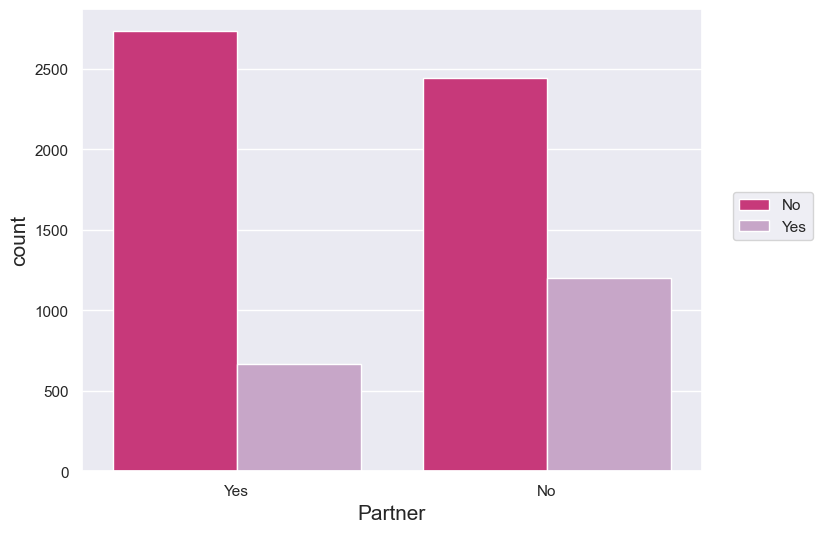

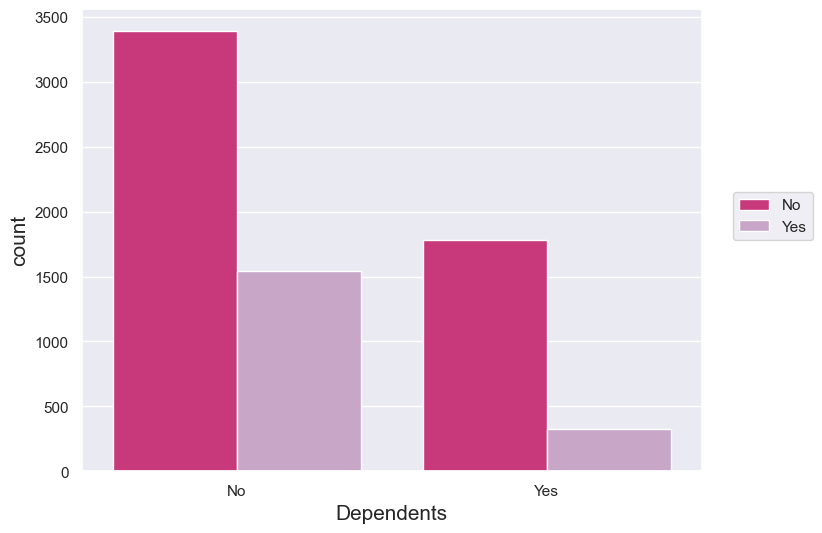

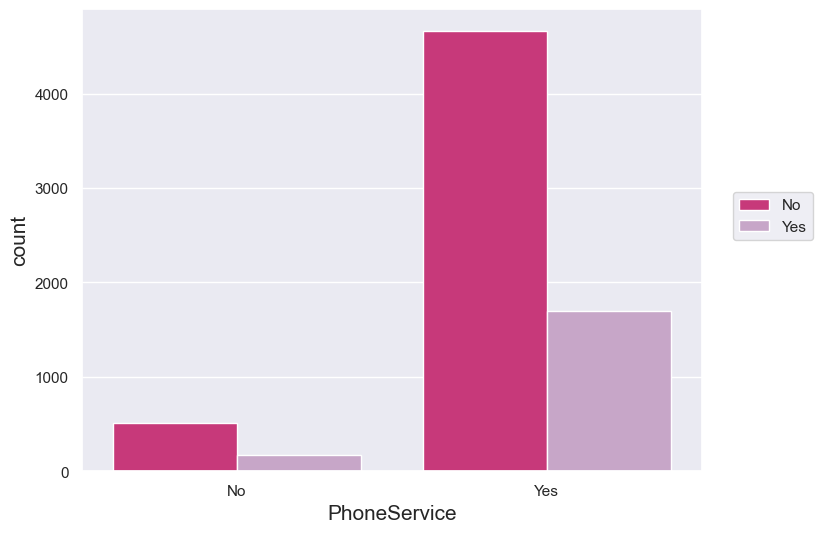

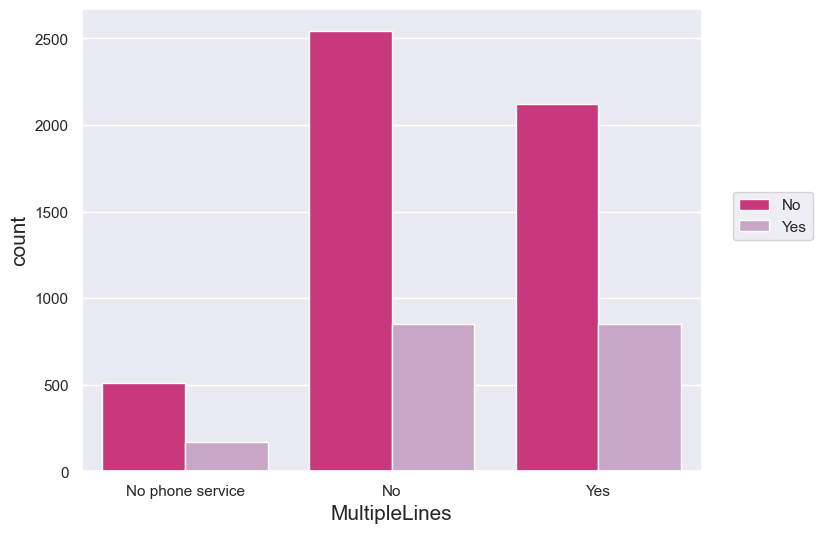

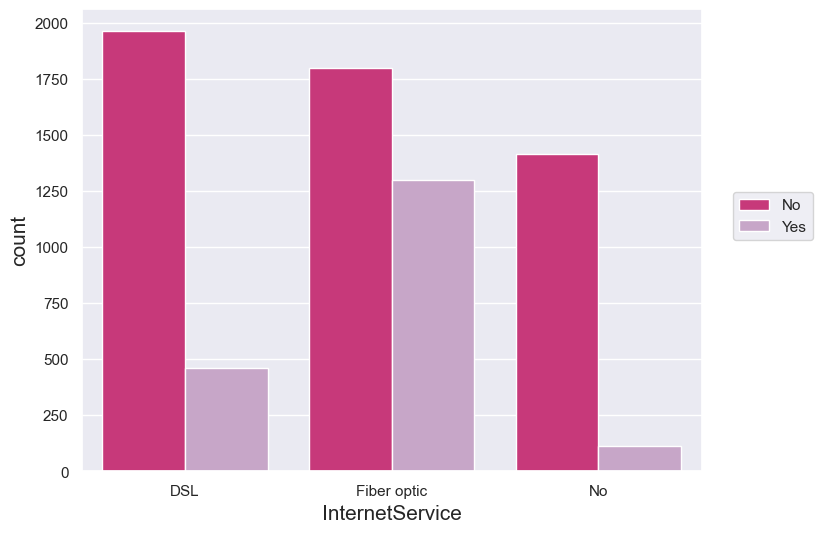

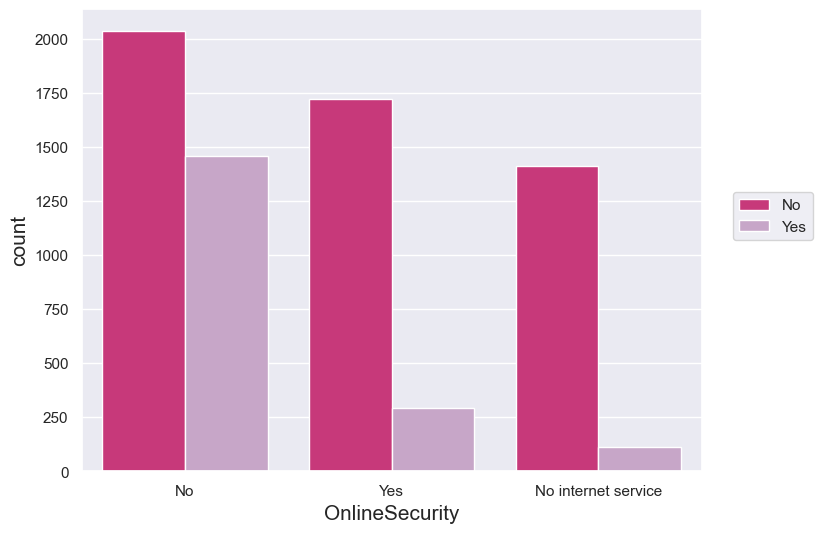

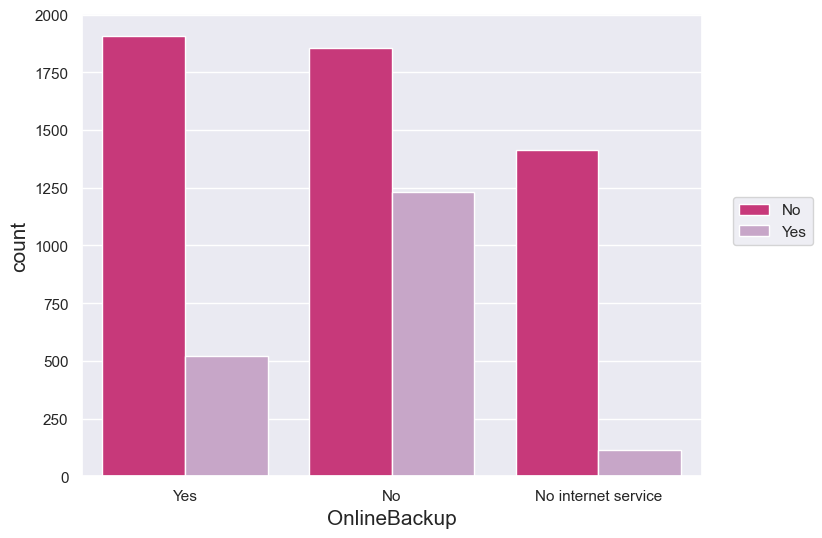

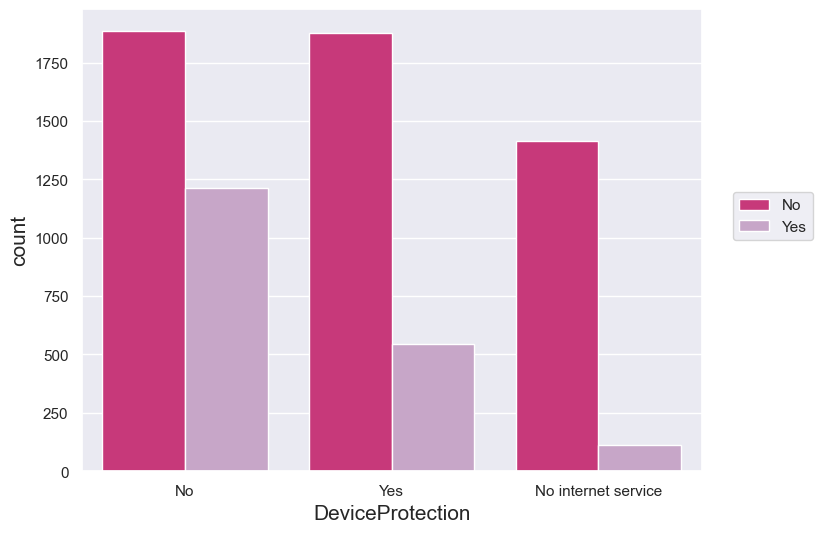

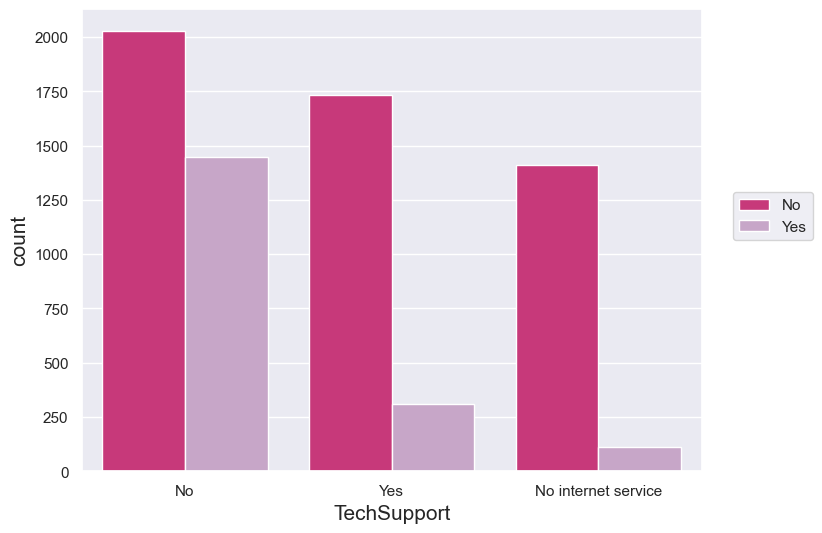

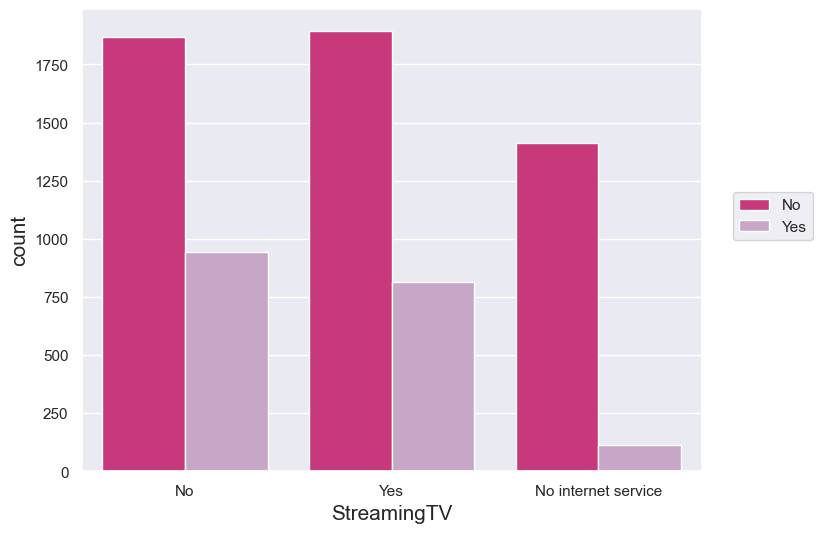

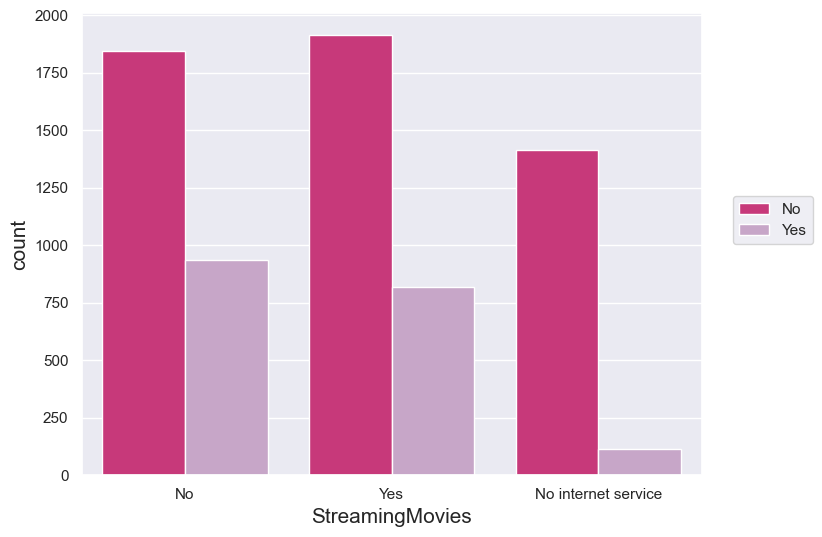

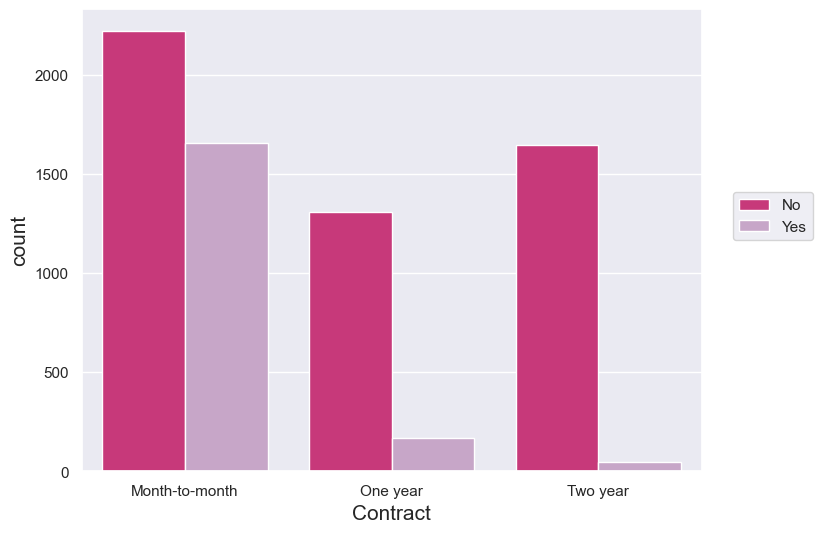

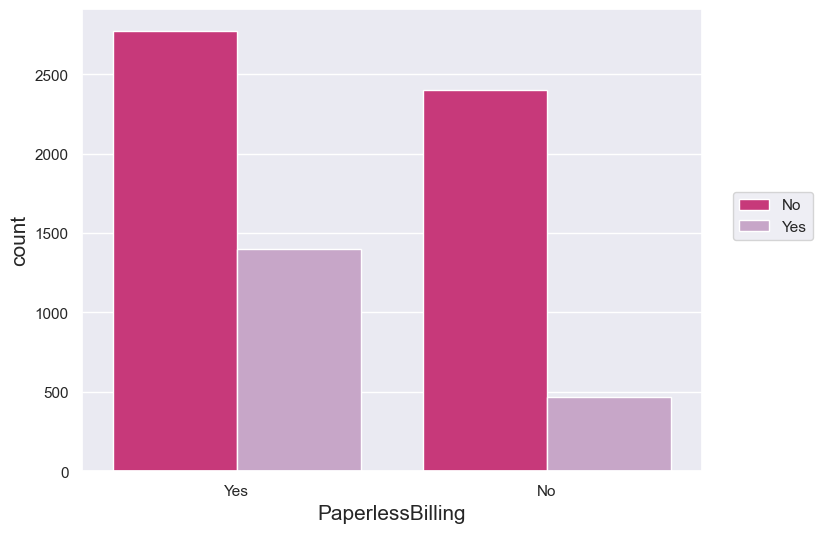

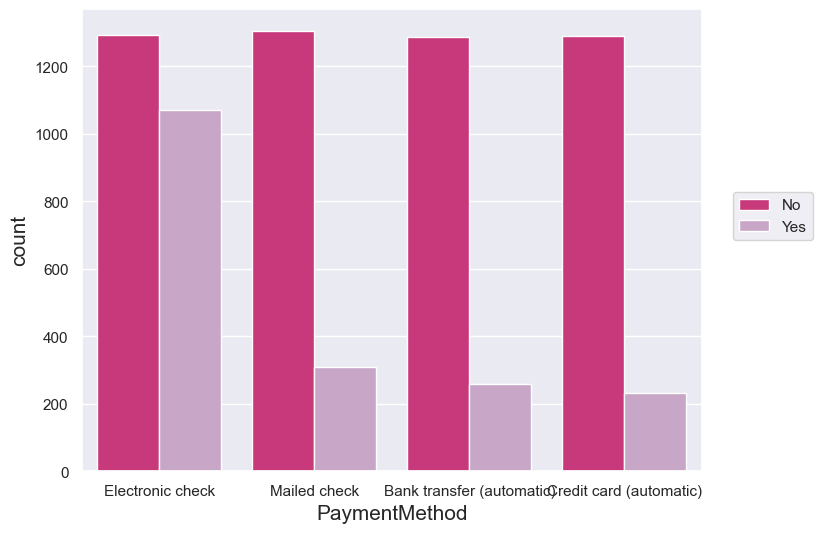

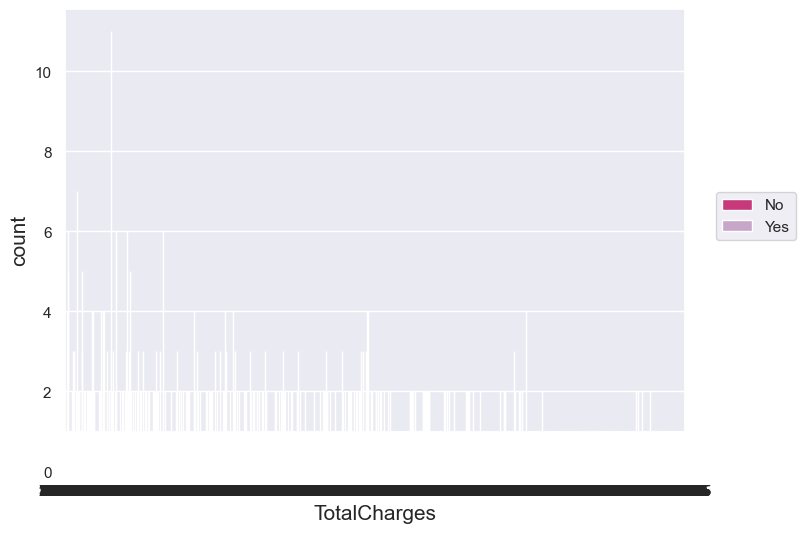

In [139]:
sns.set(rc={'figure.figsize':(11.7,8.27),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df,x=col, hue='Churn', palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))

**Observations**
- Gender doesn't play an important role in the Churn
- People who doesn't have partner has higher chances of leaving
- people who opted for FiberOptics are likely to leave, maybe because of competitive price or high service cost - Need to be explored
- People who have not opted for tech support, device protection, Online backup and online security are likely to leave

# Data Preprocessing and Feature Engineering

In [140]:
input_cols = list(df.iloc[:, :-1])
target_cols = "Churn"

In [141]:
pd.options.display.max_columns=30

In [142]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [143]:
df.gender = pd.get_dummies(df.gender, drop_first=True, dtype="int64")

In [145]:
df.Partner = pd.get_dummies(df.Partner, drop_first=True, dtype="int64")

In [146]:
df.Dependents = pd.get_dummies(df.Dependents, drop_first=True, dtype="int64")

In [147]:
df.PhoneService = pd.get_dummies(df.PhoneService, drop_first=True, dtype="int64")

In [148]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le = LabelEncoder()

In [151]:
df.MultipleLines = le.fit_transform(df.MultipleLines)

In [152]:
df.InternetService = le.fit_transform(df.InternetService)

In [153]:
df.OnlineSecurity = le.fit_transform(df.OnlineSecurity)

In [154]:
df.OnlineBackup = le.fit_transform(df.OnlineBackup)

In [155]:
df.DeviceProtection = le.fit_transform(df.DeviceProtection)

In [156]:
df.PaperlessBilling = pd.get_dummies(df.PaperlessBilling, drop_first=True)

In [157]:
df.TechSupport = le.fit_transform(df.TechSupport)

In [158]:
df.StreamingTV = le.fit_transform(df.StreamingTV)

In [159]:
df.StreamingMovies = le.fit_transform(df.StreamingMovies)

In [160]:
df.Contract = le.fit_transform(df.Contract)

In [161]:
df.PaymentMethod = le.fit_transform(df.PaymentMethod)

In [162]:
df.Churn = le.fit_transform(df.Churn)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   uint8  
 16  PaymentMethod     7043 non-null   int32  


In [182]:
df.TotalCharges = df['TotalCharges'].str.strip()

In [187]:
df.TotalCharges.replace("", "0", inplace=True)

## Save the Processed data

In [189]:
df.to_csv("processed_data.csv", index=False)

In [197]:
df = pd.read_csv("processed_data.csv")

In [198]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [199]:
from sklearn.preprocessing import MinMaxScaler

## Splitting the data

In [200]:
X = df.drop("Churn",axis=1)

In [201]:
y = df.Churn

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
lr = LogisticRegression()

In [206]:
model = lr.fit(X_train, y_train)

In [207]:
from sklearn.metrics import accuracy_score, 

In [208]:
y_pred = model.predict(X_test)

In [213]:
confusion_matrix(y_test, y_pred)

array([[935, 101],
       [157, 216]], dtype=int64)